In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

import mlgrad.func as func
import mlgrad.avragg as avragg
import mlgrad.mlocation_scatter2 as mlocation_scatter

from mlgrad import averager_it

/tmp/ipykernel_82884/3129576371.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])
/tmp/ipykernel_82884/3129576371.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])
/tmp/ipykernel_82884/3129576371.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain avai

In [2]:
import matplotlib as mpl

In [3]:
mpl.rcParams['figure.autolayout'] = True
#mpl.rcParams

In [4]:
# def permutate_values(Yp, Y, m):
#     d = {}
#     for yp,y in zip(Yp, Y):
#         c = d.setdefault((yp,y), 0)
#         d[(yp,y)] = c+1
#     print(d)
#     values = np.array(list(d.values()))
#     keys = list(d.keys())
#     indices = list(np.argsort(values))
#     keys = [keys[indices[-i]] for i in range(1,m+1)]
#     print(keys)
#     d = dict(keys)
#     for i in range(len(Y)):
#         yp = Yp[i]
#         Yp[i] = d[yp]

In [5]:
attr_names = ["log.Te", "log.light"]
df = pd.read_csv("data/starsCYG.csv", sep=',', usecols=attr_names)

In [6]:
#df

In [7]:
X = np.c_[tuple(df[name] for name in attr_names)]
# X = scale(X)
# np.set_printoptions()
# with np.printoptions(precision=2, linewidth=256, edgeitems=10, suppress=True):
#     print(X)

In [8]:
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
x_min = min(x1_min, x2_min)
x_max = max(x1_max, x2_max)
extent = (x_min, x_max, x_min, x_max)
xrange1 = np.linspace(x_min, x_max, 100)
xrange2 = np.linspace(x_min, x_max, 100)
XX1, XX2, = np.meshgrid(xrange1, xrange2)
XX = np.c_[XX1.ravel(), XX2.ravel()]

In [30]:
avgmin = avragg.Minimal()
avrfunc = averager_it(func.QuantileFunc(0.9, func.Sqrt(0.01)))
avrfunc = avragg.WMAverage(avrfunc)
hcd = mlocation_scatter.MLocationsScattersEstimator(avrfunc, avgmin, 2, 
                                    tol=1.0e-9)

In [31]:
hcd.fit(X)

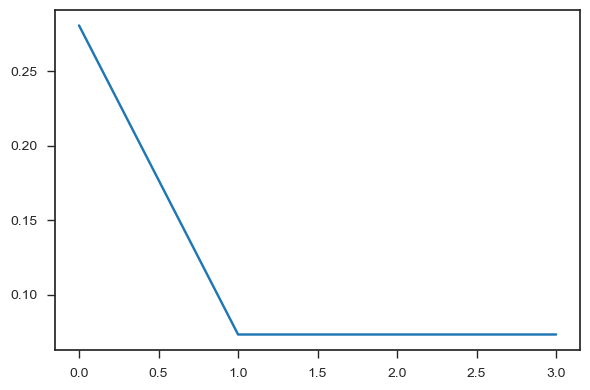

In [32]:
plt.figure(figsize=(6,4))
# plt.subplot(1,2,1)
# plt.plot(hcd.dvals)
# plt.subplot(1,2,2)
plt.plot(hcd.dvals2)
plt.show()

In [33]:
D = hcd.evaluate_dist(XX)
DD = D.reshape(XX1.shape)
print(D.min(), D.max())

0.00022578492689551553 9.265676155106942


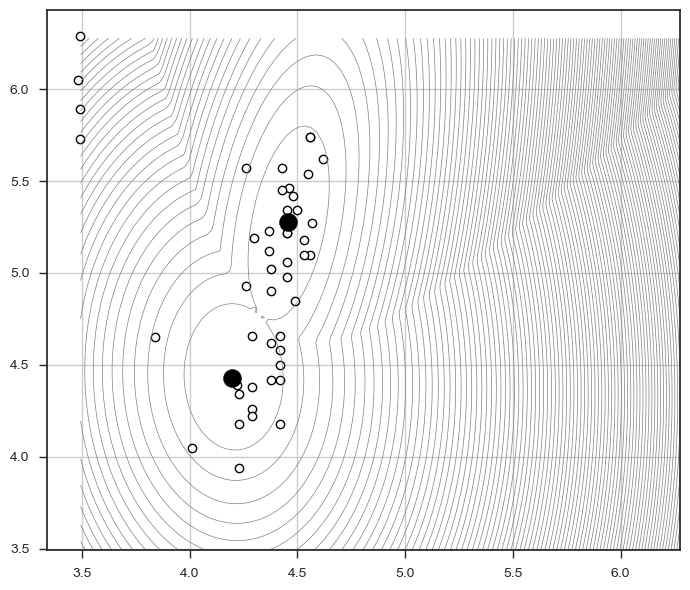

In [34]:
plt.figure(figsize=(7,6))
plt.scatter(X[:,0], X[:,1], c='w', edgecolors='k', marker='o', s=36, linewidths=1.0)
plt.contour(DD, origin='lower', extent=extent, 
            levels=np.linspace(0.0,D.max(),100), colors='grey', linewidths=0.5)
plt.scatter(hcd.locs[:,0], hcd.locs[:,1], c='k', edgecolors='k', s=169)
plt.grid(1)
plt.show()

### Среднее арифметическое

In [15]:
arith = avragg.ArithMean()
km = mlocation_scatter.MLocationsScattersEstimator(arith, avgmin, 2, 
                                    tol=1.0e-6)

In [16]:
km.fit(X)

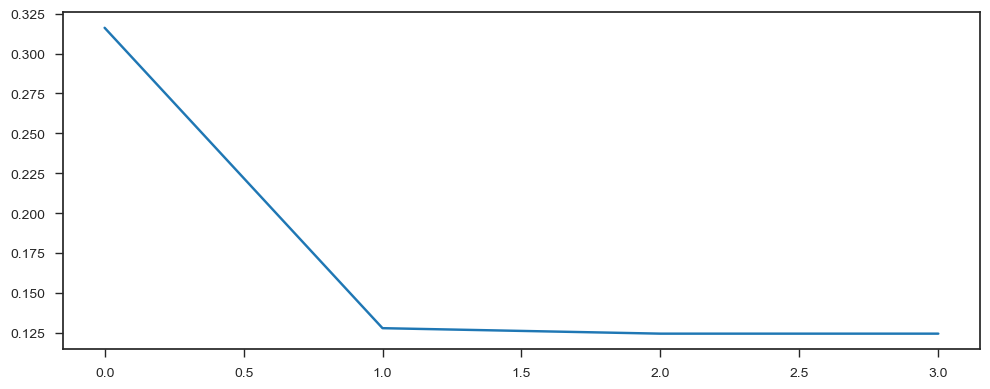

In [17]:
plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
# plt.plot(km.dvals)
# plt.subplot(1,2,2)
plt.plot(km.dvals2)
plt.show()

In [18]:
D2 = km.evaluate_dist(XX)
DD2 = D2.reshape(XX1.shape)
print(D2.min(), D2.max())

4.232401807972887e-05 8.267151976442383


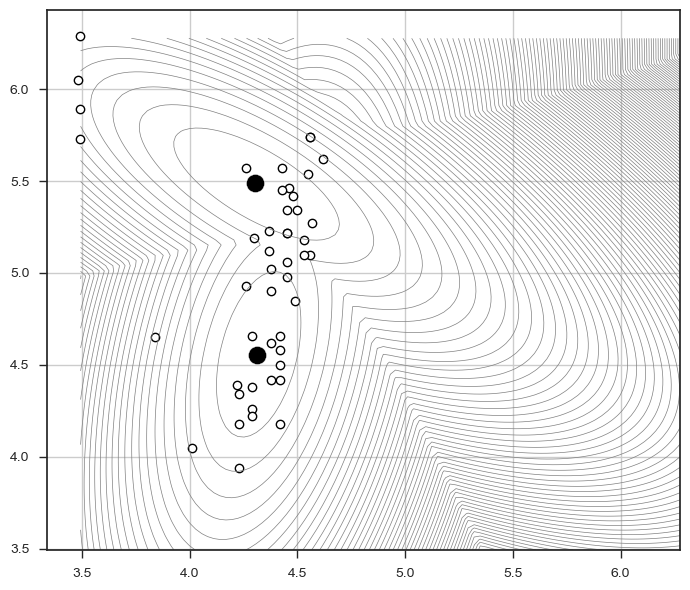

In [19]:
plt.figure(figsize=(7,6))
plt.contour(DD2, origin='lower', extent=extent, 
            levels=np.linspace(0.,D2.max(),100), colors='grey', linewidths=0.5)
plt.scatter(X[:,0], X[:,1], c='w', edgecolors='k', marker='o', s=36, linewidth=1.0)
plt.scatter(km.locs[:,0], km.locs[:,1], c='k', edgecolors='w', s=169)
plt.grid(1)
plt.show()

In [ ]:
plt.figure(figsize=(14,6.5))

plt.subplot(1,2,1)
plt.title('Robust algorithm')
plt.contour(DD, origin='lower', extent=extent, 
            levels=np.linspace(0.,D.max(),50), colors='grey', linewidths=0.5)
plt.scatter(X[:,0], X[:,1], c='w', edgecolors='k', marker='o', s=64)
plt.scatter(hcd.locs[:,0], hcd.locs[:,1], c='k', edgecolors='k', s=100)

plt.subplot(1,2,2)
plt.title('Regular algorithm')
plt.contour(DD2, origin='lower', extent=extent, 
            levels=np.linspace(0.,D2.max(),100), colors='grey', linewidths=0.5)
plt.scatter(X[:,0], X[:,1], c='w', edgecolors='k', marker='o', s=64)
plt.scatter(km.locs[:,0], km.locs[:,1], c='k', edgecolors='w', s=100)
plt.savefig('fig/robust_kmeans_center_variance_s4.eps')
plt.tight_layout()
plt.show()

In [ ]:
print(7./len(X), len(X))